This validates that the flat prior has the same effect as bounds.

In [3]:
import numpy as np
import betterplotlib as bpl

bpl.set_style()

In [9]:
def lognormal(x, mean, log_sigma):
    """
    Lognormal distribution PDF. This is not normalized to unit
    area, but normalized to a peak value of 1, so function
    in concert with a flat prior.

    :param x: X values to determine the value of the PDF at
    :param mean: Mean of the Gaussian
    :param sigma: Standard deviation of the Gaussian
    :return: Value of the gamma PDF at this location
    """
    return np.exp(-0.5 * ((np.log10(x) - np.log10(mean)) / log_sigma) ** 2)

In [11]:
def flat_with_lognormal_edges(x, flat_min, flat_max, side_log_width):
    if flat_min <= x <= flat_max:
        return 1
    elif x < flat_min:
        return lognormal(x, flat_min, side_log_width)
    else:
        return lognormal(x, flat_max, side_log_width)

In [16]:
xs = np.logspace(-3, 3, 1000)
ys = [flat_with_lognormal_edges(x, 0.1, 15, 0.05) for x in xs]

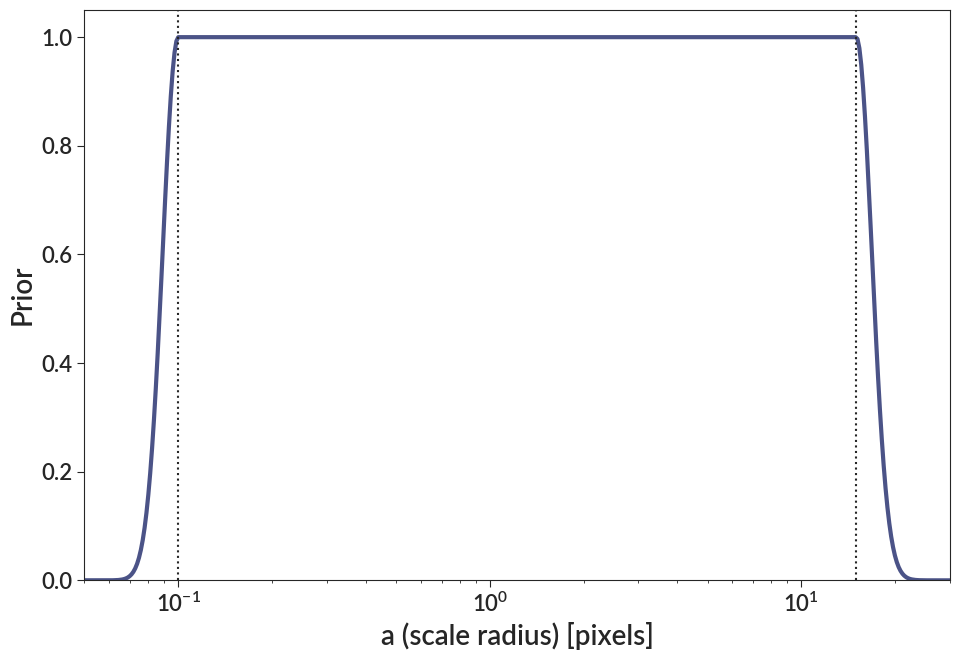

In [27]:
fig, ax = bpl.subplots()
ax.plot(xs, ys)
ax.set_xscale("log")
ax.set_limits(0.05, 30, 0, 1.05)
ax.axvline(0.1, ls=":")
ax.axvline(15, ls=":")
ax.add_labels("a (scale radius) [pixels]", "Prior")
fig.savefig("a_prior.png")